## Download an image from the archive, display it and find sources in it.

### Outline

- Download an image from the Hubble archive (either from the web interface or with astroquery)
- Learn about FITS format
- Display the image in ds9 (play with ds9 features)
- Display in matplotlib
- Overlay the coordinate system grid on the image
- Use photutils.daofind to find objects in the image
- Make a table with x, y coordinates of the object
- Transform to RA, DEC
- Talk about astropy.table (stretch goal)
- Clean up notebook and get it ready for presentation

#### Barbara A. Mikulski Archive For Space Telescopes (MAST)

https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html

Download a 47 Tuc image with WFC3/UVIS.

$ ls HST

ib2j02020_asn.fits	ib2j02020_drc.fits	ib2j02020_drz.fits

#### FITS Format

(Explain FITS - HDUs)

Library to read/write FITS is in astropy

In [1]:
from astropy.io import fits

Let's open the "drz" file and look at  its contents 

In [2]:
f = fits.open('MAST_2019-12-16T0515/HST/ib2j02020/ib2j02020_drz.fits')
f.info()

Filename: MAST_2019-12-16T0515/HST/ib2j02020/ib2j02020_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     879   ()      
  1  SCI           1 ImageHDU        80   (4125, 4387)   float32   
  2  WHT           1 ImageHDU        47   (4125, 4387)   float32   
  3  CTX           1 ImageHDU        42   (4125, 4387)   int32   
  4  HDRTAB        1 BinTableHDU    559   6R x 275C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, K, 11A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, K, 8A, 23A, D, D, D, D, K, K, 8A, 23A, 9A, 18A, 4A, K, D, D, D, K, K, K, K, 23A, D, D, D, D, K, K, 4A, 3A, 4A, L, D, D, D, 23A, 1A, K, D, D, D, 4A, 1A, 12A, 12A, 8A, 23A, D, D, 10A, 10A, D, D, D, 4A, 3A, 3A, 4A, 8A, 7A, D, K, D, 6A, 9A, 8A, D, D, 4A, 18A, 3A, K, 5A, 4A, D, 13A, 8A, 4A, 3A, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, L, 1A, 4A, D, 3A, 6A, D, D, D, D, D, 23A, D, D, D, D, D, 1A, K, K, K, K, D, 3A, K, D, 5A, 7A, D, D, D, D, D, D

The empty parenthesis "()" in the "Dimensions" column indicates that the 0-th HDU has no data. This is called the "Primary Header" and ususally information common  to all extensions in a file is stored there. FITS headers store "cards". A card consists of a 8 char keyword, a value and a comment. 

In [3]:
f[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
NEXTEND =                    4 / Number of standard extensions                  
FILENAME= 'ib2j02020_drz.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'WFC3  '             / identifier for instrument used to acquire data 
EQUINOX =               2000

The first extension (or HDU) is called `SCI` and it holds the science data and metadata.

In [4]:
f[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4125                                                  
NAXIS2  =                 4387                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'ib2j02n9q                         ' / rootname of the observation set
EXPNAME = 'ib2j02n9q                ' / exposure identifier                     
BUNIT   = 'ELECTRONS/S'     

In [5]:
f[1].data

array([[0.21333972, 0.12276965, 0.11808193, ...,        nan,        nan,
               nan],
       [0.15288083, 0.1432973 , 0.08322287, ...,        nan,        nan,
               nan],
       [0.20467745, 0.19509572, 0.14375083, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)

Let's look at the data. There are seevral ways to display astronomical images. 
The most popular one (still) is a command line program called `ds9`.
We will look at it later.

Now we will use a python package, perhaps most popular for plotting, called `matplotlib`.

<IPython.core.display.Javascript object>


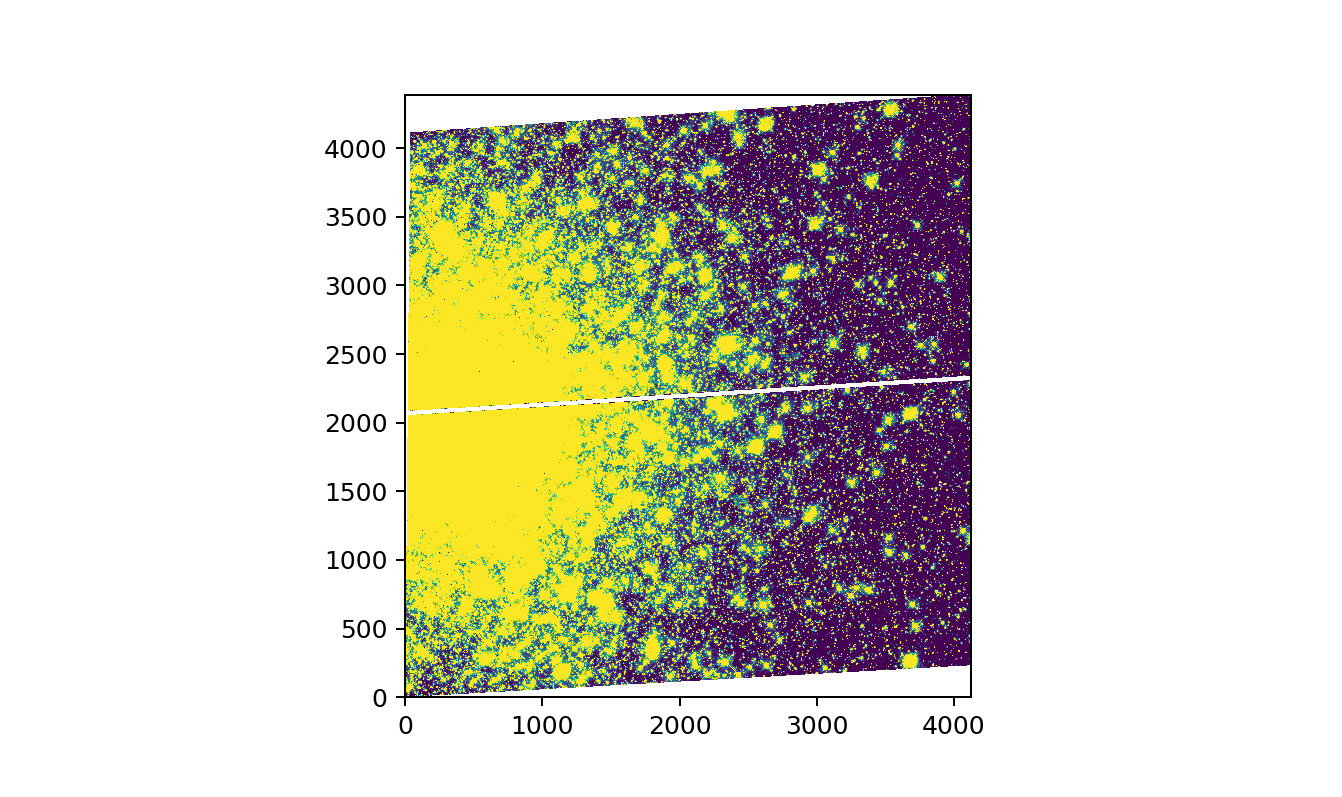

In [7]:
from matplotlib import pyplot as plt
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'viridis'

# Run the %matplotlib magic command to enable inline plotting
# in the current notebook.  Choose one of these:
%matplotlib inline
%matplotlib notebook

plt.imshow(f[1].data)

The reason we don't see anything is that that the range of values in the image is too big.
From the matplotlib documentation
```
vmin, vmax : scalar, optional
When using scalar data and no explicit *norm*, *vmin* and *vmax*
define the data range that the colormap covers. By default,
the colormap covers the complete value range of the supplied
data. *vmin*, *vmax* are ignored if the *norm* parameter is used.
```

In order to 

In [14]:
from astropy.stats import sigma_clipped_stats

data = f[1].data
mean, median, std = sigma_clipped_stats(data, sigma=3.0)  
print((mean, median, std))  

(0.3477376, 0.19171251, 0.38499793)


<IPython.core.display.Javascript object>


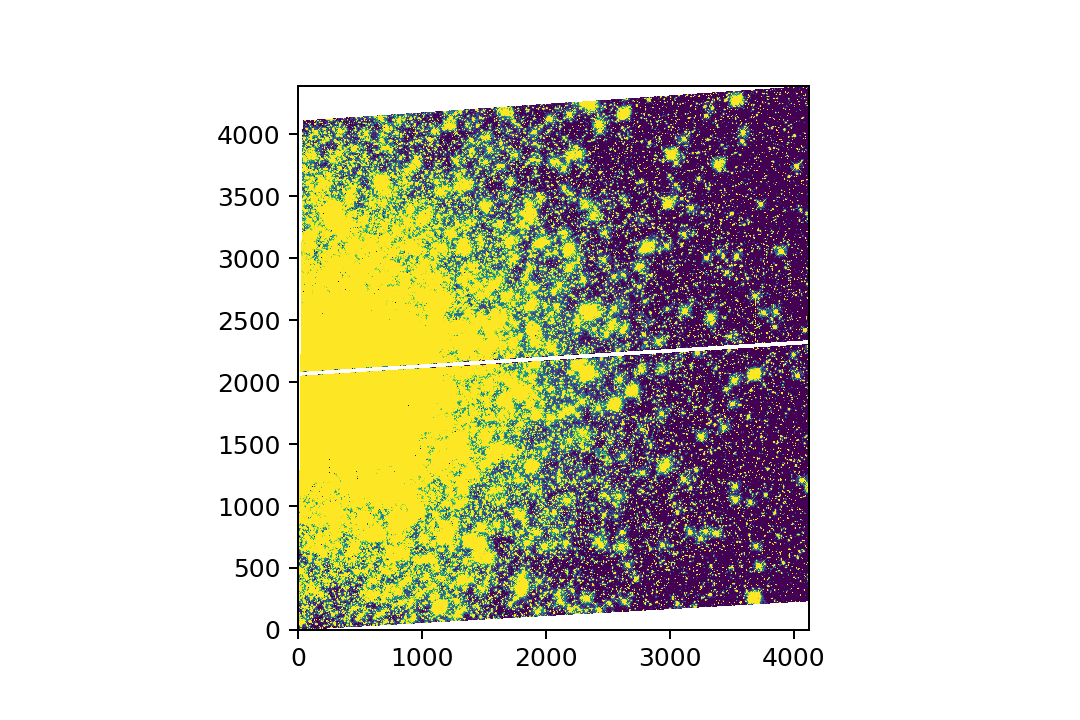

In [15]:
plt.imshow(f[1].data, vmin=0.1, vmax=.4, origin='lower')

### Find sources in the image

In [16]:
from photutils import DAOStarFinder

daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources = daofind(data - median)  
for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)  

  id  xcentroid ycentroid sharpness  ... sky    peak      flux       mag     
----- --------- --------- ---------- ... --- --------- --------- ------------
    1  76.58509 8.2947292 0.53391074 ...   0 4.5660357 1.8517496  -0.66895564
    2 107.83369 9.8454609 0.61241317 ...   0  19.13257 8.1404888   -2.2766262
    3 24.313196 11.535737 0.61279672 ...   0 24.958967  9.946341   -2.4941584
    4 178.87552 16.856692 0.60009801 ...   0 12.022348 5.0089508   -1.7493669
    5 263.45071 16.840395  0.6146889 ...   0 68.061584 28.459258   -3.6355589
    6 278.96879 16.708516 0.78408682 ...   0 5.9816203 2.0888103   -0.7997475
    7 119.06121  17.55365 0.50385548 ...   0 3.7820668 1.7814539  -0.62693649
    8 90.805293 18.946769 0.64094838 ...   0 37.161991 15.237078   -2.9572542
    9 196.13411 20.139918 0.65751376 ...   0 20.431953 8.3560956   -2.3050085
   10 316.43556 20.875582 0.60049925 ...   0 10.934423 4.6273359   -1.6633276
  ...       ...       ...        ... ... ...       ...       ...

In [17]:
sources[0]

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,76.58509,8.2947292,0.53391074,0.67649971,0.20100449,25,0,4.5660357,1.8517496,-0.66895564


### How to get information about a function or an object?

In [ ]:
#DAOStarFinder?


In [ ]:
# import matplotlib.pyplot as plt
# from astropy.visualization import SqrtStretch
# from astropy.visualization.mpl_normalize import ImageNormalize
# from photutils import CircularAperture
# positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
# apertures = CircularAperture(positions, r=4.)
# norm = ImageNormalize(stretch=SqrtStretch())
# plt.imshow(data, cmap='Greys', origin='lower', norm=norm)
# apertures.plot(color='blue', lw=1.5, alpha=0.5)

In [18]:
x, y = sources['xcentroid'], sources['ycentroid']
#print(x,y)

### Transform x, y to celestial coordinates

In [19]:
from astropy import wcs
from astropy import units as u

w = wcs.WCS(f[1].header)

ra, dec = w.all_pix2world(x, y, 1)

In [20]:
print(ra, dec)

[6.06758705 6.06833795 6.06618362 ... 6.05777467 6.0551973  6.05633643] [-72.06418199 -72.06443712 -72.06380064 ... -72.12889792 -72.12826597
 -72.12862682]


<IPython.core.display.Javascript object>


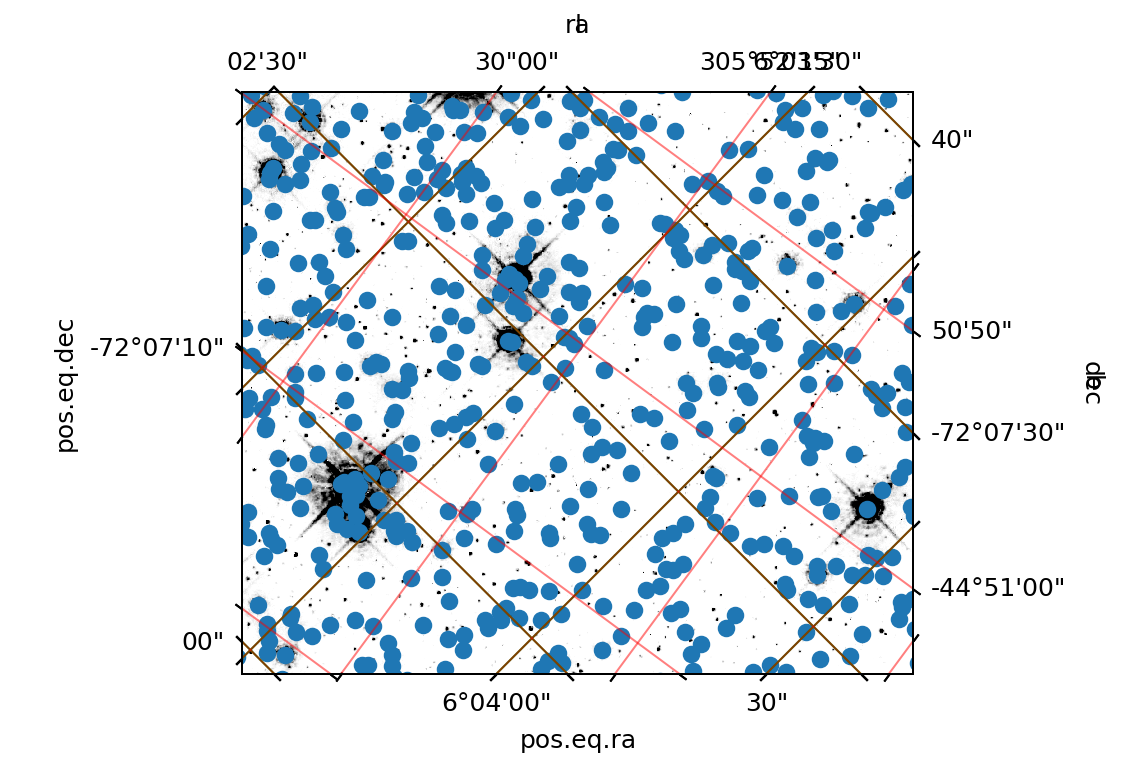

In [22]:
#from matplotlib import pyplot as plt
#%matplotlib notebook

ax = plt.subplot(projection=w)
ax.imshow(data, vmin=.1, vmax=.5, cmap='Greys', origin='lower')
ax.scatter(ra, dec, transform=ax.get_transform('world'))

ax.coords[0].set_format_unit(u.degree)



In [ ]:
ax.grid(color='green', ls='solid')

In [25]:
type(sources)

astropy.table.table.Table

In [26]:
sources.write('sources.csv')